<a href="https://colab.research.google.com/github/marta-brasola/MachineLearningProject/blob/main/progetto_travel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


# Airline passengers satisfaction analysis and classification


1. **Gender**: male or female
2. **Customer type**: regular or non-regular airline customer
3. **Age**: the actual age of the passenger
4. **Type of travel**: the purpose of the passenger's flight (personal or business travel)
5. **Class**: business, economy, economy plus
6. **Flight distance**
7. **Inflight wifi service**: satisfaction level with Wi-Fi service on board (0: not rated; 1-5)
8. **Departure/Arrival time convenient**: departure/arrival time satisfaction level (0: not rated; 1-5)
9. **Ease of Online booking**: online booking satisfaction rate (0: not rated; 1-5)
10. **Gate location**: level of satisfaction with the gate location (0: not rated; 1-5)
11. **Food and drink**: food and drink satisfaction level (0: not rated; 1-5)
12. **Online boarding**: satisfaction level with online boarding (0: not rated; 1-5)
13. **Seat comfort**: seat satisfaction level (0: not rated; 1-5)
14. **Inflight entertainment**: satisfaction with inflight entertainment (0: not rated; 1-5)
15. **On-board service**: level of satisfaction with on-board service (0: not rated; 1-5)
16. **Leg room service**: level of satisfaction with leg room service (0: not rated; 1-5)
17. **Baggage handling**: level of satisfaction with baggage handling (0: not rated; 1-5)
18. **Checkin service**: level of satisfaction with checkin service (0: not rated; 1-5)
19. **Inflight service**: level of satisfaction with inflight service (0: not rated; 1-5)
20. **Cleanliness**: level of satisfaction with cleanliness (0: not rated; 1-5)
21. **Departure delay in minutes**
22. **Arrival delay in minutes**




In [14]:
train = pd.read_csv("/content/drive/MyDrive/progetto_travel/data/train.csv", index_col=[0])
test = pd.read_csv("/content/drive/MyDrive/progetto_travel/data/test.csv", index_col=[0])
print(f'shape of the train set: {train.shape}')
print(f'shape of the test set: {test.shape}')

shape of the train set: (103904, 24)
shape of the test set: (25976, 24)


In [15]:
train.head(3)

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   Gender                             103904 non-null  object 
 2   Customer Type                      103904 non-null  object 
 3   Age                                103904 non-null  int64  
 4   Type of Travel                     103904 non-null  object 
 5   Class                              103904 non-null  object 
 6   Flight Distance                    103904 non-null  int64  
 7   Inflight wifi service              103904 non-null  int64  
 8   Departure/Arrival time convenient  103904 non-null  int64  
 9   Ease of Online booking             103904 non-null  int64  
 10  Gate location                      103904 non-null  int64  
 11  Food and drink                     1039

In [17]:
def to_categorical(df, int_columns):
    for col in int_columns:
        df[df.columns[col]] = df[df.columns[col]].astype('category')
    return df

In [18]:
categorical_indexes = [1, 2, 4, 5] + list(range(7, 21)) + [23]
train = to_categorical(train, categorical_indexes)
test = to_categorical(test, categorical_indexes)

In [19]:
train.drop(columns='id', axis=1, inplace=True)
test.drop(columns='id', axis=1, inplace=True)

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

In [ ]:
palette1 = ['#0b3954','#087e8b','#bfd7ea','#ff5a5f','#c81d25']
palette2 = ['#0b3954','#087e8b','#bfd7ea','##F6F5AE','#c81d25']


# EDA

Prima di tutto, dividi il dataset in una parte di training e una parte di test. Inizia ad analizzare il dataset. Presta attenzione a che dataset utilizzare per ogni punto (training, test o tutto?). Tra le varie cose da fare, considera anche:

Sono presenti degli outlier? Se sì, che percentuale? Trovi qui alcuni modi per l’identificazione degli outlier.
Ci sono variabili categoriche? Come pensi di trattarle?
le varie feature potrebbero avere valori molto diversi. Questo non è un bene per quasi qualsiasi algoritmo di ML, quindi valuta se applicare una Standardizzazione al dataset, come ad esempio StandardScaler(). Fai attenzione a escludere la colonna delle label!
Chiediti poi le seguenti domande:

Ci sono delle feature che presentano valori mancanti? Come ti comporti? Commenta le tue analisi in modo chiaro.
Controlla se il dataset è bilanciato?
Quanto sono correlate le variabili? Ci sono dei casi di multicollinearità (correlation coefficient uguale a 1)?
Sono tutte le variabili necessarie o posso selezionarne un sottoinsieme e trascurare le altre? Studia bene la correlation matrix ed effettua poi un test del Chi-square per vedere quali feature sono più importanti. Oltre al Chi-square prova la Mutual Information e confronta se le feature selezionate sono le stesse.

## Is it a balaced set or not?

When dealing with a classification problem it is important to study whether or not the target variable is balanced or unbalanced. An unbalanced dataset has implication on the way I should train the model and evaluate the performance at the end, because it may require tecnique such as SMOTE.

In [21]:
round(train.satisfaction.value_counts(normalize=True),2)

neutral or dissatisfied    0.57
satisfied                  0.43
Name: satisfaction, dtype: float64

In this case, wiht a distribution of 57% for the neutral or dissatisfied class and 43% for the satisfied other class is not perfectly balanced, but it's not severly imbalanced either.

## Are Train and Test set different or similar in the distribution?

- andiamo ad esplorare il train e test set per vedere se sono differenti in termini di distribuzione
  - spiegare perché sto facendo questo lavoro e cosa comporterebbe avere train e test set distribuiti diversamente (soprattutto la variabile target)

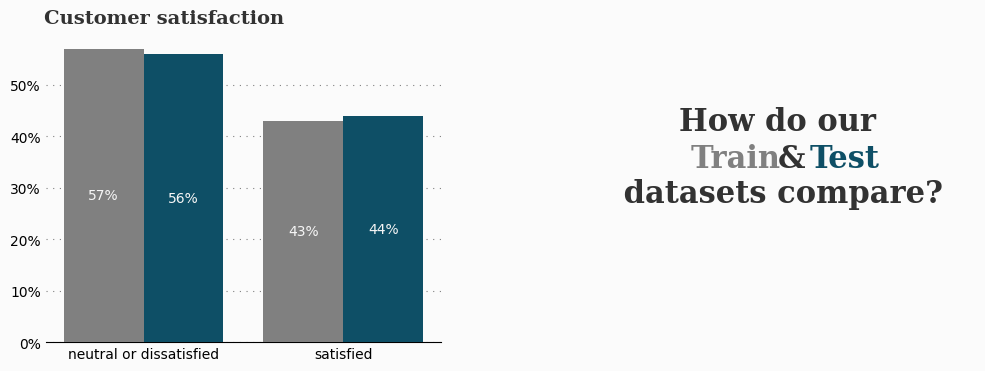

In [22]:
background_color = "#fbfbfb"

fig = plt.figure(figsize=(12,4))
fig.patch.set_facecolor(background_color)
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.35, hspace=0.27)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

## AX0 - SATISFACTION
train_ratio = round(train['satisfaction'].value_counts(normalize=True),2).reset_index()
train_ratio['satisfaction'] = train_ratio['satisfaction']*100
test_ratio = round(test['satisfaction'].value_counts(normalize=True),2).reset_index()
test_ratio['satisfaction'] = test_ratio['satisfaction']*100

x = np.arange(len(train_ratio))
ax0.text(-0.3, 62, 'Customer satisfaction', fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax0.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax0.bar(x, height=train_ratio["satisfaction"], zorder=3, color="gray", width=0.4)
ax0.bar(x+0.4, height=test_ratio["satisfaction"], zorder=3, color="#0e4f66", width=0.4)
ax0.set_xticks(x + 0.4 / 2)
ax0.set_xticklabels(['neutral or dissatisfied','satisfied'])
ax0.yaxis.set_major_formatter(mtick.PercentFormatter())
ax0.yaxis.set_major_locator(mtick.MultipleLocator(10))

for i,j in zip([0, 1, 2], train_ratio["satisfaction"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i, j/2), color='#f6f6f6',
                 horizontalalignment='center', verticalalignment='center')

for i,j in zip([0, 1, 2], test_ratio["satisfaction"]):
    ax0.annotate(f'{j:0.0f}%',xy=(i+0.4, j/2), color='#f6f6f6',
                 horizontalalignment='center', verticalalignment='center')

## AX4 - TITLE

ax1.spines["bottom"].set_visible(False)
ax1.tick_params(left=False, bottom=False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")
ax1.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax1.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax1.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')

## GENERAL SETTINGS
for i in range(0,2):
    locals()["ax"+str(i)].set_facecolor(background_color)

for i in range(0,2):
    locals()["ax"+str(i)].tick_params(axis=u'both', which=u'both',length=0)


for s in ["top","right","left"]:
    for i in range(0,2):
        locals()["ax"+str(i)].spines[s].set_visible(False)

plt.show()

- commentare che tra il train e il test set non ci sono particolari differenze, per questo siamo contenti

- analizzare anche le distribuzioni delle singole variabili

In [12]:
train.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103594.000000
mean,39.379706,1189.448375,14.815618,15.178678
std,15.114964,997.147281,38.230901,38.698682
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


**Age**: The distribution appears approximately normal, as the mean and median are close in value. The standard deviation (std) of 15 suggests some variability around the mean, indicating a moderate spread of data points. The relatively thicker tails of the distribution may suggest the presence of some outliers or extreme values.

**Flight Distance**: The distribution is right-skewed, as evidenced by the notable difference between the mean (1189) and the median (849). The higher standard deviation suggests a wide dispersion of data points, with some flights covering significantly longer distances, potentially indicating the presence of outliers or extreme values on the higher end of the spectrum.

**Departure Delay in Minutes** and **Arrival Delay in Minutes**: Both distributions exhibit a similar pattern. The mean being around 15 while the median is 0 implies a right-skewed distribution with a long tail to the right. The standard deviation of approximately 38 indicates a substantial variation around the mean, suggesting a considerable spread of delay times, possibly due to occasional significant delays

In [27]:
train.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6,2
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4,neutral or dissatisfied
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179,58879


To have a better view on the categoriacl variables I decided to plot them all together.

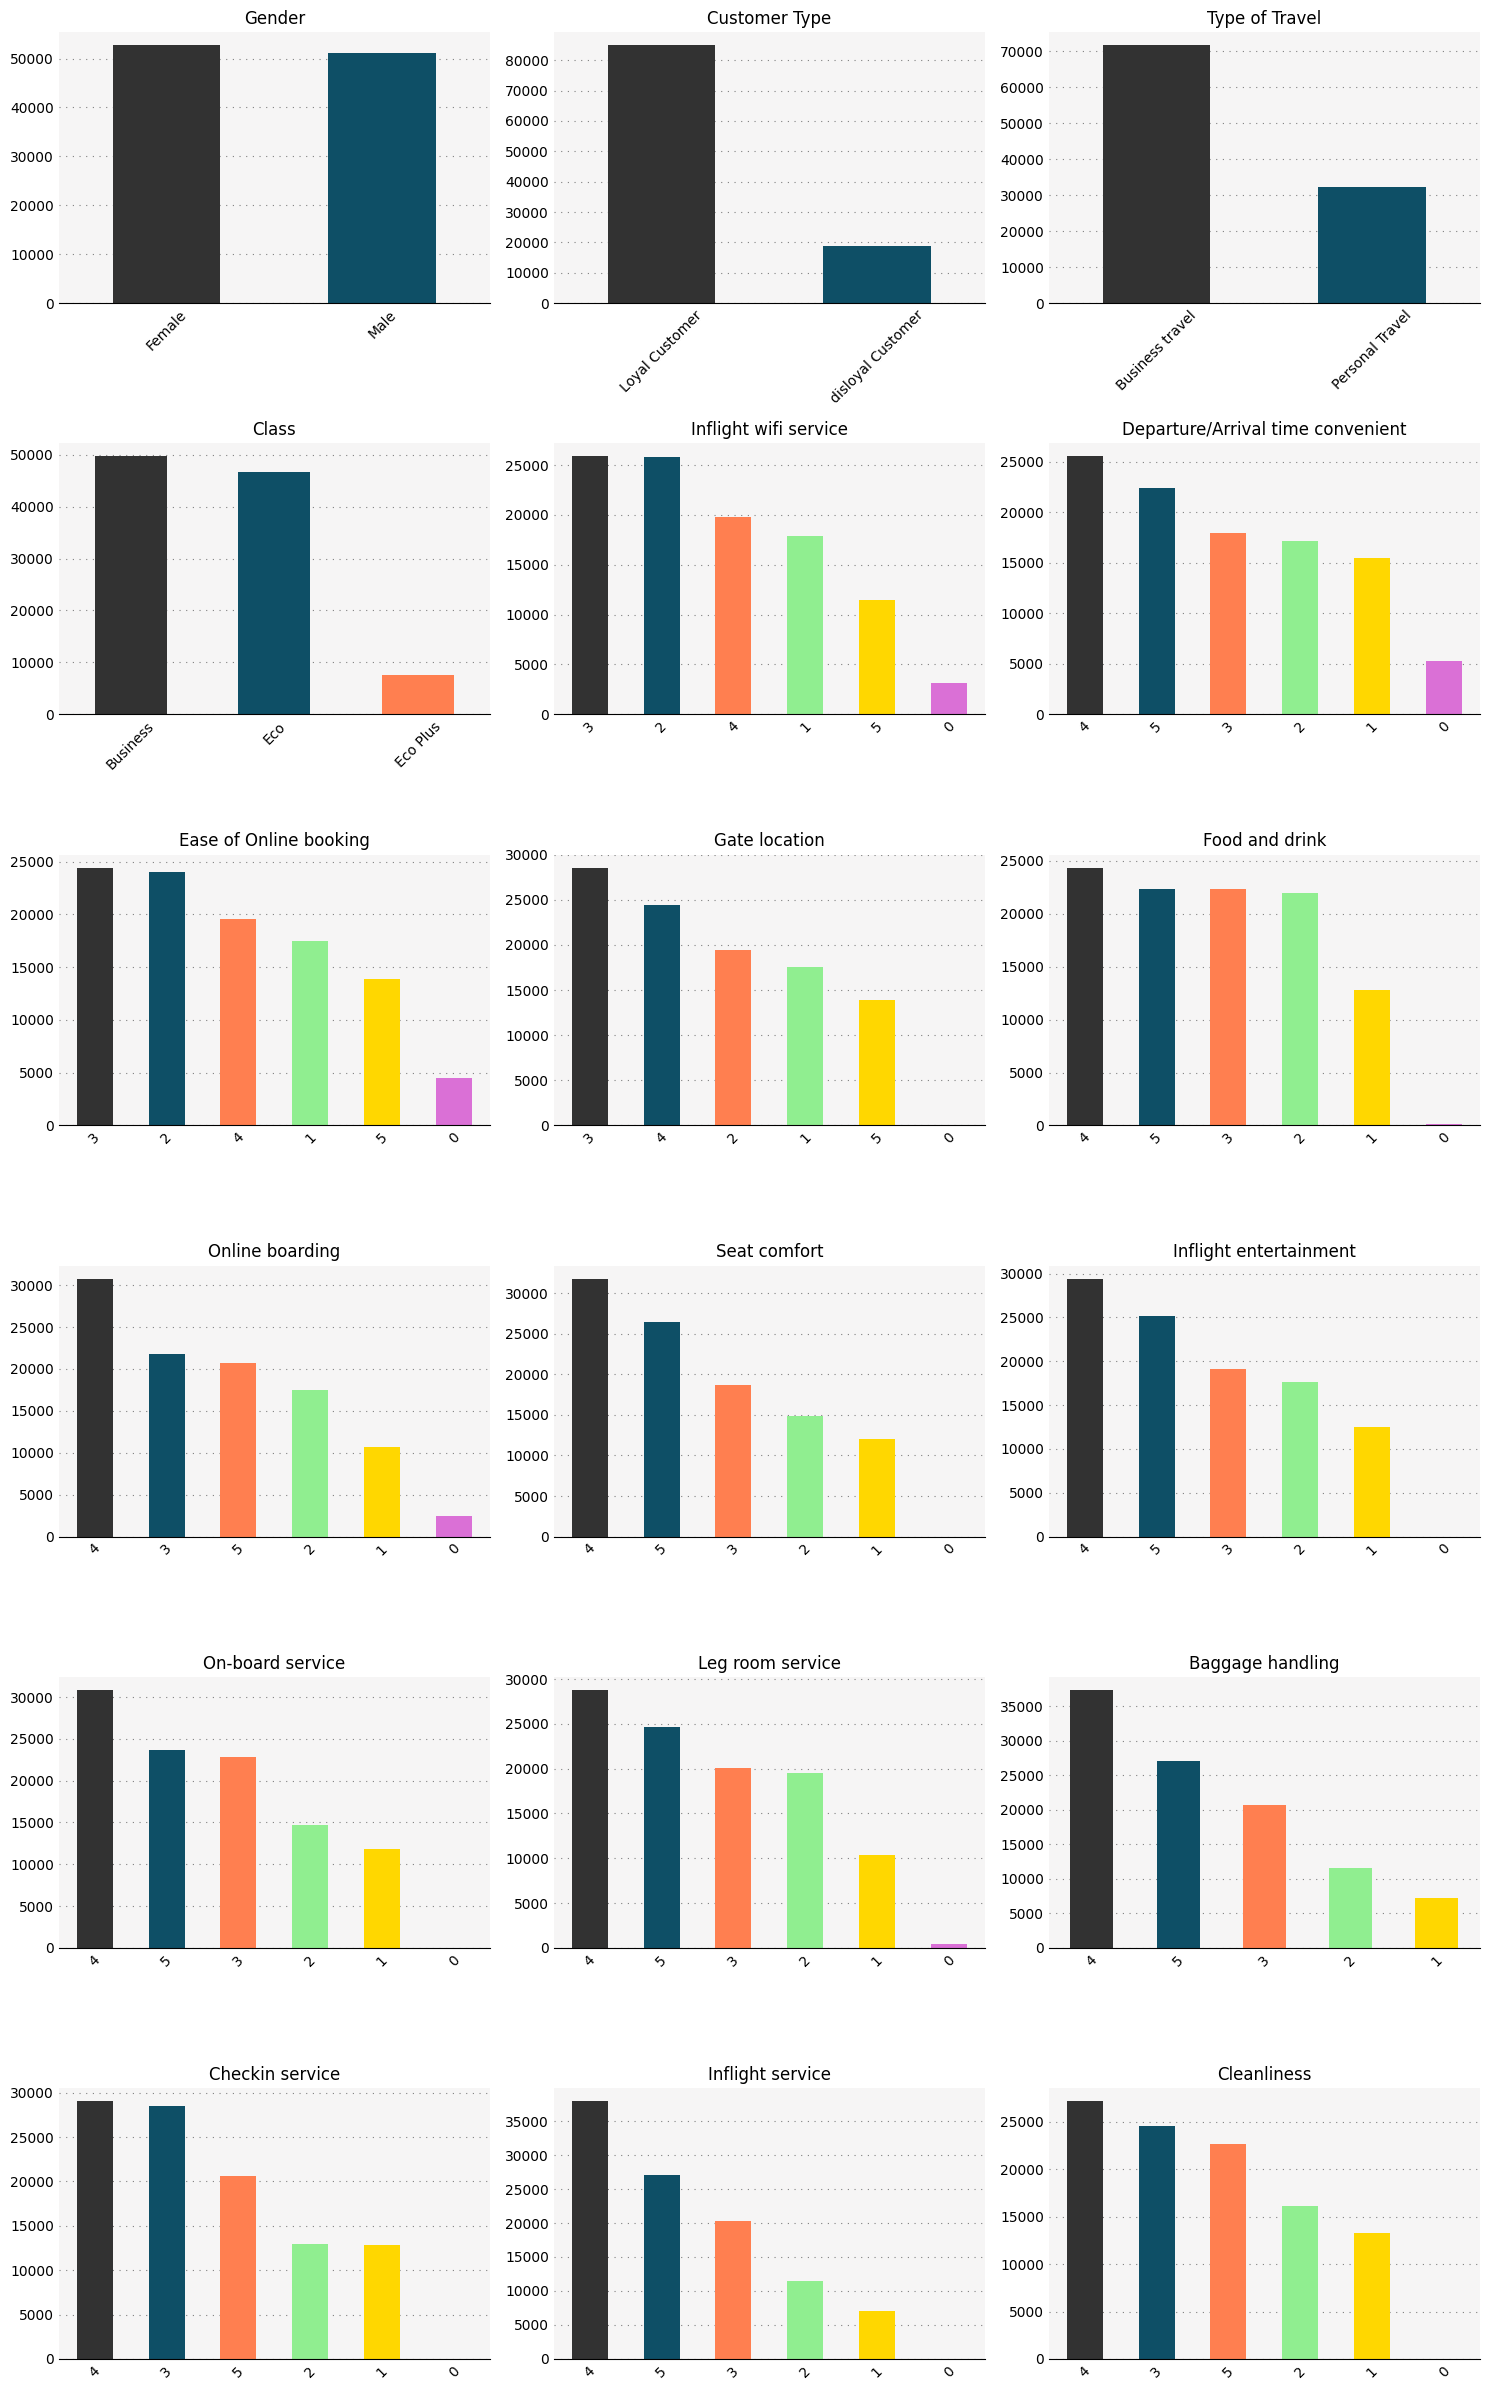

In [29]:
categorical_columns = [col for col in train.columns if pd.api.types.is_categorical_dtype(train[col])][:-1]

# Defining the custom color palette
custom_palette = ["#323232", "#0e4f66", "#FF7F50", "#90EE90", "#FFD700", "#DA70D6"]

# Plotting the data
fig, axes = plt.subplots(6,3, figsize=(15, 24))

for i, column in enumerate(categorical_columns):
    ax = axes[i // 3, i % 3]
    train[column].value_counts().plot(kind='bar', ax=ax, color=custom_palette)
    ax.set_title(column)

    # Applying general settings
    background_color = '#f6f5f5'
    ax.set_facecolor(background_color)
    ax.tick_params(axis='both', which='both', length=0)

    for s in ["top", "right", "left"]:
        ax.spines[s].set_visible(False)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='center')
    ax.grid(color='gray', linestyle=':', axis='y',  dashes=(1, 5))
    ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

COMMENTS

- the number of men and women in this sample is approximately the same;
- costumers are mostly loyal instead of disloyeal;
- there is also a significance imbalance towards business trips rather than personal ones;
- inflight wife, boarding online and ease of online booking and gate location are the only service offered by this airline that do not have the 5-star rating in the first two spots so this would be services to get better at;
- there is no service in which the most popular rating is 5 star;

0 rating how should be interpreted?



In [ ]:
# sto mettendo 0 anche alle variabili continue
train.replace(0, np.NaN, inplace=True)

## Analysis against target variable

- fare boxplot per vedere la distribuzione delle variabili continue rispetto alla variabile target satisfaction. Tra departure e arrival delay prendo in considerazione sono Arrival Delay in minutes.

In [ ]:
## to do mettere questi valori in boxplot
train.groupby('satisfaction')[train.select_dtypes(include=np.number).columns.tolist()].mean()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
satisfaction,,,,
neutral or dissatisfied,37.566688,928.919971,16.503728,17.127536
satisfied,41.750583,1530.140255,12.608084,12.630799


In [ ]:
result_table = pd.crosstab(train['Gender'], train['satisfaction'])
prop_table = round(result_table / result_table.sum().sum(), 4)
cond_table = round(result_table.div(result_table.sum(1), axis=0), 2)
print(result_table)
print(prop_table)
print(cond_table)


satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          30193      22534
Male                            28686      22491
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                         0.2906     0.2169
Male                           0.2761     0.2165
satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                           0.57       0.43
Male                             0.56       0.44


## Multicollinearity

- explain what multicollinearity is and what can imply to the estimation of the model
- check multicollinearity between numerical variables with partial and raw correlation
- look if I can compute correlation between categorical varaibles, how it's calculated and if it has significance

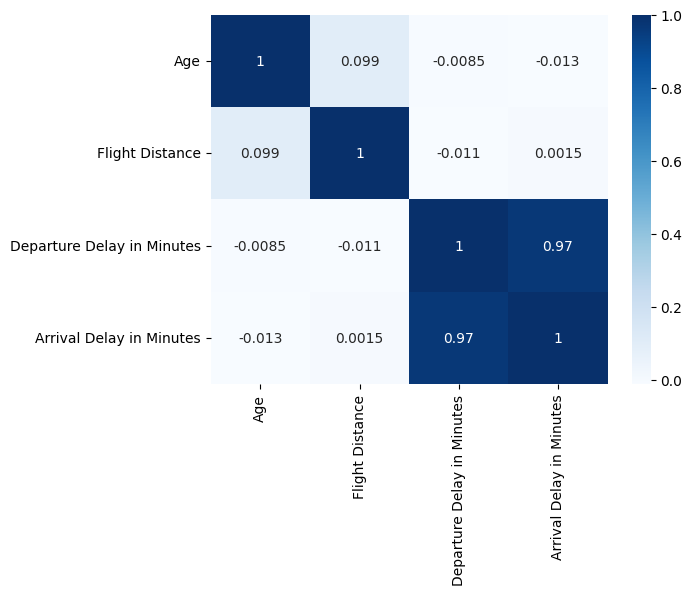

In [ ]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

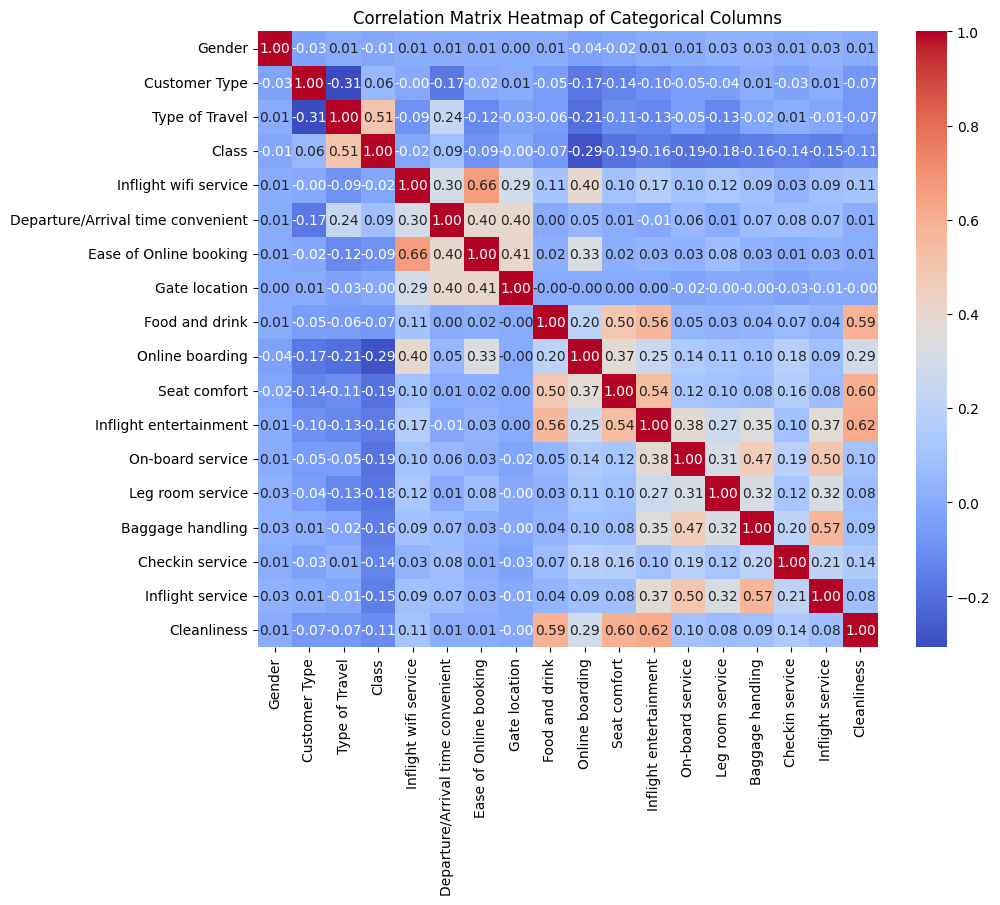

In [ ]:
train_categorical_numeric = train[categorical_columns].apply(lambda x: x.astype('category').cat.codes)

# Calculate the correlation between categorical columns
correlation_matrix = train_categorical_numeric.corr(method='kendall')
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap of Categorical Columns')
plt.show()

# PREPROCESSING

During this phase I will focus on:
- handling missing values;
- scaling;
- handling categorical values for models training.




## Handling missing values

I will now check if there are missing values or not in the dataset, both train and test set.

In [ ]:
train.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [ ]:
test.isnull().sum()/len(test)

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

<ipython-input-60-f56d8145b686>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()


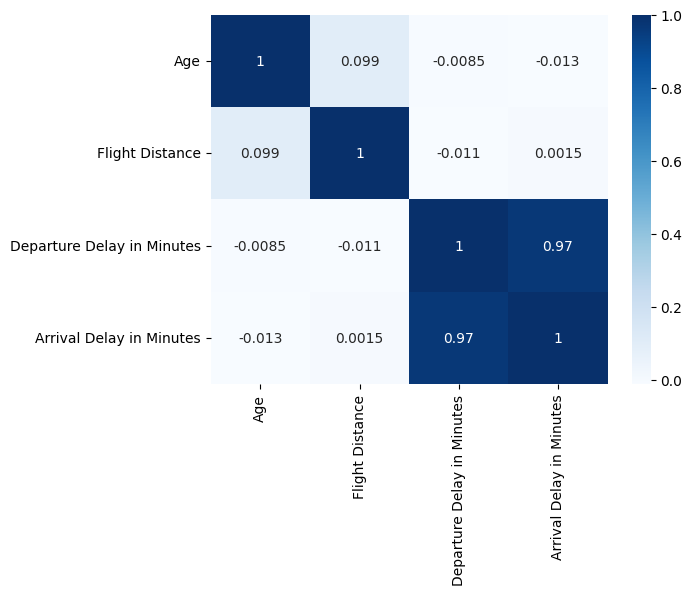


In this case missing values are less the 1% on both the train and test set.
There are many ways of imputing the missing values in a dataset, in this cases since there is an high linear correlation between the arrival and departure delay of a flight I decided to compute the missing values based an univariate linear regression.

plottare la distribuzione di tutte le variabili categoriche in un unico (?) plot

possibili palette:
- ['#007bc2', '#00a1e0', '#00c2b8', '#ffdd00', '#ff9d00'] (con blue gialli)
- ['#ffbe0a','#f57e00','#d72828','#2a9d90','#1a4231'] con giallo arancione rosso verdino e verde scuro


# MODELS
